In [1]:
ENV["JULIA_PKG_USE_CLI_GIT"] = "true"
cd("/leonardo_work/Sis25_degironc_0/apol/aceconverge2025/")
pwd()

import Pkg
Pkg.activate(".")
using ACEpotentials, LinearAlgebra, Printf

  Activating project at `/leonardo_work/Sis25_degironc_0/apol/aceconverge2025`


# Basis checking

## Carbon

## Silicon 

In [2]:
basis_bin = Dict()
orders = [2,3,4]
degrees = [[24,20],[24,20,16],[24,20,16,12]]
basis_tags = ["24.20","24.20.16","24.20.16.12"]

for (i,ord) in enumerate(orders)
    basis = ACE1x.ace_basis(
        elements = [:Si],
        order = ord,
        totaldegree = degrees[i],
        rcut = 6.0,
        r0 = 2.20707071, # for silicon dataset
        pure = false)
    basis_bin[basis_tags[i]] = basis
    println("basis_bin[\"" * basis_tags[i] * "\"]")
    println(length(basis))
end

# basis_bin_pure = Dict()
# for (i,ord) in enumerate(orders)
#     basis = ACE1x.ace_basis(
#         elements = [:Si],
#         order = ord,
#         totaldegree = degrees[i],
#         rcut = 6.0,
#         r0 = 2.20707071, # for silicon dataset
#         pure = true)
#     basis_bin_pure[basis_tags[i]] = basis
#     println("basis_bin[\"" * basis_tags[i] * "\"]")
#     println(length(basis))
# end

basis_bin["24.20"]
297
basis_bin["24.20.16"]
802
basis_bin["24.20.16.12"]
929


# Error extraction from complete potentials

## Carbon

In [2]:
vset = "Val1k_n"
dsets = ["Tr1k_n"]
ecost = "10.0"
elossweight = parse(Float64, ecost)
weights = Dict("shaiducarbon" => Dict("E" => elossweight, "F" => 1.0))
basisvals = ["24.20","24.20.16","24.20.16.12"]
Vref = OneBody(:C => -245.44385736)
datakeys = (energy_key = "energy", force_key = "force")
val_data_dir = "./datasets/$(vset).xyz"; val_data = read_extxyz(val_data_dir)
val_atoms = [ACEpotentials.AtomsData(v; weights=weights, v_ref=Vref, datakeys...) for v in val_data]

pots = Dict()
pots_pure = Dict()
errs = Dict("train" => Dict(), "val" => Dict())
errs_pure = Dict("train" => Dict(), "val" => Dict())

for dset in dsets
    train_data_dir = "./datasets/$(dset).xyz"; train_data = read_extxyz(train_data_dir)
    train_atoms = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in train_data]
    for basisval in basisvals
        # Load potential
        pots["$(dset)_$(basisval)"] = load_potential("./acejulia/$(dset)/$(basisval)/ecost$(ecost)/potential.json")
        pots_pure["$(dset)_$(basisval)"] = load_potential("./acejulia/$(dset)_purify/$(basisval)/ecost$(ecost)/potential.json")
        # Compute errors
        errs["train"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(train_atoms, pots["$(dset)_$(basisval)"])
        errs_pure["train"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(train_atoms, pots_pure["$(dset)_$(basisval)"])
        errs["val"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(val_atoms, pots["$(dset)_$(basisval)"])
        errs_pure["val"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(val_atoms, pots_pure["$(dset)_$(basisval)"])
    end
end


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.



[ Info: RMSE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  48.993 │    0.530 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  48.993 │    0.530 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  33.432 │    0.337 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  33.432 │    0.337 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  48.993 │    0.530 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  48.993 │    0.530 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  33.432 │    0.337 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  33.432 │    0.337 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  65.509 │    0.558 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  65.509 │    0.558 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  38.103 │    0.337 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  38.103 │    0.337 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  65.509 │    0.558 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  65.509 │    0.558 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  38.103 │    0.337 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  38.103 │    0.337 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘

This potential was saved with following versions:


[ Info: RMSE Table
[ Info: MAE Table



JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  23.954 │    0.326 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  23.954 │    0.326 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  16.091 │    0.205 │   0.000 │
├──────────────┼─────────┼─

[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  23.917 │    0.326 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  23.917 │    0.326 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  16.078 │    0.205 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  16.078 │    0.205 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  28.997 │    0.380 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  28.997 │    0.380 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  17.999 │    0.210 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  17.999 │    0.210 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  28.883 │    0.379 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  28.883 │    0.379 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  17.955 │    0.210 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  17.955 │    0.210 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘

This potential was saved with following versions:


[ Info: RMSE Table
[ Info: MAE Table



JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  21.889 │    0.312 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  21.889 │    0.312 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  14.714 │    0.196 │   0.000 │
├──────────────┼─────────┼─

[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  21.878 │    0.312 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  21.878 │    0.312 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  14.664 │    0.196 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  14.664 │    0.196 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  27.652 │    0.374 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  27.652 │    0.374 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  16.723 │    0.203 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  16.723 │    0.203 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  27.779 │    0.370 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  27.779 │    0.370 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘
┌──────────────┬─────────┬──────────┬─────────┐
│         Type │ E [meV] │ F [eV/A] │ V [meV] │
├──────────────┼─────────┼──────────┼─────────┤
│ shaiducarbon │  16.705 │    0.202 │   0.000 │
├──────────────┼─────────┼──────────┼─────────┤
│          set │  16.705 │    0.202 │   0.000 │
└──────────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


## Out-of-domain

In [17]:
vset = "Si2_val"
dsets = ["Si345_train", "Si3_train", "Si4_train", "Si5_train"]
ecost = "50.0"
elossweight = parse(Float64, ecost)
weights = Dict("default" => Dict("E" => elossweight, "F" => 1.0))
basisvals = ["24.20","24.20.16","24.20.16.12"]
Vref = OneBody(:Si => -7881.32677981122) # Si2 isolated energy
datakeys = (energy_key = "energy", force_key = "forces")
val_data_dir = "./datasets/$(vset).xyz"; val_data = read_extxyz(val_data_dir)
val_atoms = [ACEpotentials.AtomsData(v; weights=weights, v_ref=Vref, datakeys...) for v in val_data]

pots = Dict()
pots_pure = Dict()
errs = Dict("train" => Dict(), "val" => Dict())
errs_pure = Dict("train" => Dict(), "val" => Dict())

for dset in dsets
    train_data_dir = "./datasets/$(dset).xyz"; train_data = read_extxyz(train_data_dir)
    train_atoms = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in train_data]
    for basisval in basisvals
        # Load potential
        pots["$(dset)_$(basisval)"] = load_potential("./acejulia/$(dset)/$(basisval)/ecost$(ecost)/potential.json")
        pots_pure["$(dset)_$(basisval)"] = load_potential("./acejulia/$(dset)_purify/$(basisval)/ecost$(ecost)/potential.json")
        # Compute errors
        errs["train"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(train_atoms, pots["$(dset)_$(basisval)"])
        errs_pure["train"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(train_atoms, pots_pure["$(dset)_$(basisval)"])
        errs["val"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(val_atoms, pots["$(dset)_$(basisval)"])
        errs_pure["val"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(val_atoms, pots_pure["$(dset)_$(basisval)"])
    end
end


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  80.432 │    0.693 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  80.432 │    0.693 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  62.798 │    0.493 │   0.000 │
├─────────┼─────────┼──────────

[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  80.432 │    0.693 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  80.432 │    0.693 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  62.798 │    0.493 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  62.798 │    0.493 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │ 174.724 │    1.899 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │ 174.724 │    1.899 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  12.918 │    0.378 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  12.918 │    0.378 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   9.641 │    0.273 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   9.641 │    0.273 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  12.883 │    0.377 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  12.883 │    0.377 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   9.591 │    0.273 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   9.591 │    0.273 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │ 427.085 │    1.052 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │ 427.085 │    1.052 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   9.823 │    0.342 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   9.823 │    0.342 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   7.145 │    0.243 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   7.145 │    0.243 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   9.842 │    0.341 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   9.842 │    0.341 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   7.153 │    0.242 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   7.153 │    0.242 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │ 454.856 │    0.705 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │ 454.856 │    0.705 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.329 │    0.019 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.329 │    0.019 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.159 │    0.007 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.159 │    0.007 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.316 │

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.336 │    0.019 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.336 │    0.019 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.164 │    0.007 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.164 │    0.007 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.316 │

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  11.857 │    0.463 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  11.857 │    0.463 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   8.596 │    0.322 │   0.000 │
├─────────┼─────────┼──────────

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.239 │    0.037 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.239 │    0.037 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.169 │    0.025 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.169 │    0.025 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.208 │

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table




If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.241 │    0.037 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.241 │    0.037 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.168 │    0.025 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.168 │    0.025 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  54.618 │    0.598 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  54.618 │    0.598 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  43.299 │    0.448 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  43.299 │    0.448 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  54.618 │    0.598 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  54.618 │    0.598 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  13.376 │    0.394 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  13.376 │    0.394 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  10.310 │    0.295 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  10.310 │    0.295 │   0.00

[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  12.709 │    0.394 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  12.709 │    0.394 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   9.762 │    0.295 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   9.762 │    0.295 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬──────────┬──────────┬─────────┐
│    Type │  E [meV] │ F [eV/A] │ V [meV] │
├─────────┼──────────┼──────────┼─────────┤
│ default │ 1207.641 │    0.836 │   0.000 │
├─────────┼──────────┼──────────┼─────────┤
│     set │ 1207.641 │    0.836 │   0.000 │
└─────────┴──────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├───

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  10.771 │    0.366 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  10.771 │    0.366 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   8.334 │    0.272 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   8.334 │    0.272 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  10.607 │    0.364 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  10.607 │    0.364 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   8.236 │    0.271 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   8.236 │    0.271 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬──────────┬──────────┬─────────┐
│    Type │  E [meV] │ F [eV/A] │ V [meV] │
├─────────┼──────────┼──────────┼─────────┤
│ default │ 1127.801 │    1.191 │   0.000 │
├─────────┼──────────┼──────────┼─────────┤
│     set │ 1127.801 │    1.191 │   0.000 │
└─────────┴──────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├───

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


In [18]:
entries = length(keys(errs["val"]))
en_err = zeros(entries)
f_err = zeros(entries)
en_err_pure = zeros(entries)
f_err_pure = zeros(entries)

for (i,tsetbset) in enumerate(sort(collect(keys(errs["val"]))))
    # println(tsetbset) # uncomment to understand the structure 
    en_err[i] = errs["val"][tsetbset]["mae"]["default"]["E"]
    f_err[i] = errs["val"][tsetbset]["mae"]["default"]["F"]
    en_err_pure[i] = errs_pure["val"][tsetbset]["mae"]["default"]["E"]
    f_err_pure[i] = errs_pure["val"][tsetbset]["mae"]["default"]["F"]
end

en_err = reshape(en_err, (3, 4))' # transposed with (')
f_err = reshape(f_err, (3, 4))'
en_err_pure = reshape(en_err_pure, (3, 4))'
f_err_pure = reshape(f_err_pure, (3, 4))'

4×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.505453  0.567527  0.282194
 0.92107   0.92107   0.92107
 0.393557  0.434733  0.434733
 0.516895  0.445244  0.428659

In [19]:
open("./acejulia/si_errors/ood_vset$(vset)_en_err.dat", "w") do io
    for row in eachrow(en_err)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end
open("./acejulia/si_errors/ood_vset$(vset)_f_err.dat", "w") do io
    for row in eachrow(f_err)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end
open("./acejulia/si_errors/ood_vset$(vset)_en_err_pure.dat", "w") do io
    for row in eachrow(en_err_pure)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end
open("./acejulia/si_errors/ood_vset$(vset)_f_err_pure.dat", "w") do io
    for row in eachrow(f_err_pure)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end

In [15]:
errs["val"]["Si4_24.20"]["mae"]["default"]["E"]
errs_pure["val"]["Si4_24.20"]["mae"]["default"]["E"]

1.8509284013241813

In [59]:
## Data load ## 
dset = "Si5"
ecost = "50.0"
basisvals = ["24.20","24.20.16","24.20.16.12"]
pot = load_potential("./acejulia/$(dset)/$(basisvals[3])/ecost$(ecost)/potential.json");
pot_pure = load_potential("./acejulia/$(dset)_purify/$(basisvals[3])/ecost$(ecost)/potential.json");

# Validation data
Vref = OneBody(:Si => -7881.32677981122) # Si2 isolated energy
elossweight = parse(Float64, ecost)
datakeys = (energy_key = "energy", force_key = "force")
weights = Dict("default" => Dict("E" => elossweight, "F" => 1.0))
train_data_dir = "./datasets/$(dset).xyz"; train_data = read_extxyz(train_data_dir)
test_data_dir = "./datasets/Si5.xyz"; test_data = read_extxyz(test_data_dir)
train = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in train_data]
test = [ACEpotentials.AtomsData(v; weights=weights, v_ref=Vref, datakeys...) for v in test_data]

## Error extraction ## 
trainerrs = ACEpotentials.linear_errors(train, pot)
trainerrs_pure = ACEpotentials.linear_errors(train, pot_pure)
testerrs = ACEpotentials.linear_errors(test, pot)
testerrs_pure = ACEpotentials.linear_errors(test, pot_pure)


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  24.424 │    0.000 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  24.424 │    0.000 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  19.875 │    0.000 │   0.000 │
├─────────┼─────────┼──────────

[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  20.280 │    0.000 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  20.280 │    0.000 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  16.300 │    0.000 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  16.300 │    0.000 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  24.424 │    0.000 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  24.424 │    0.000 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  20.280 │    0.000 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  20.280 │    0.000 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  16.300 │    0.000 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  16.300 │    0.000 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


Dict{String, Dict{String, Any}} with 2 entries:
  "rmse" => Dict("default"=>Dict("V"=>0.0, "E"=>0.0202798, "F"=>0.0), "set"=>Di…
  "mae"  => Dict("default"=>Dict("V"=>0.0, "E"=>0.0163002, "F"=>0.0), "set"=>Di…

## In-domain

In [1]:
function export_dimers_to_dat(dimers_dict; filename)
    for ((z1, z0), (rr, v01)) in dimers_dict
        open(filename, "w") do io
            for (r, v) in zip(rr, v01)
                println(io, "$r $v")
            end
        end
    end
end

export_dimers_to_dat (generic function with 1 method)

In [16]:
vset = "Si234_val"
dsets = ["Si2_train", "Si23_train", "Si234_train", "Si2345_train"]
ecost = "50.0"
elossweight = parse(Float64, ecost)
weights = Dict("default" => Dict("E" => elossweight, "F" => 1.0))
basisvals = ["24.20","24.20.16","24.20.16.12"]
Vref = OneBody(:Si => -7881.32677981122) # Si2 isolated energy
datakeys = (energy_key = "energy", force_key = "forces")
val_data_dir = "./datasets/$(vset).xyz"; val_data = read_extxyz(val_data_dir)
val_atoms = [ACEpotentials.AtomsData(v; weights=weights, v_ref=Vref, datakeys...) for v in val_data]

pots = Dict()
pots_pure = Dict()
errs = Dict("train" => Dict(), "val" => Dict())
errs_pure = Dict("train" => Dict(), "val" => Dict())

for dset in dsets
    train_data_dir = "./datasets/$(dset).xyz"; train_data = read_extxyz(train_data_dir)
    train_atoms = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in train_data]
    for basisval in basisvals
        pots["$(dset)_$(basisval)"] = load_potential("./acejulia/$(dset)/$(basisval)/ecost$(ecost)/potential.json")
        pots_pure["$(dset)_$(basisval)"] = load_potential("./acejulia/$(dset)_purify/$(basisval)/ecost$(ecost)/potential.json")

        # Errors
        errs["train"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(train_atoms, pots["$(dset)_$(basisval)"])
        errs_pure["train"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(train_atoms, pots_pure["$(dset)_$(basisval)"])
        errs["val"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(val_atoms, pots["$(dset)_$(basisval)"])
        errs_pure["val"]["$(dset)_$(basisval)"] = ACEpotentials.linear_errors(val_atoms, pots_pure["$(dset)_$(basisval)"])

        # Dimers
        # DSI = ACEpotentials.dimers(pots["$(dset)_$(basisval)"], [:Si,]; rr = range(0.529177, 7.0, length=200))
        # D = ACEpotentials.dimers(pots_pure["$(dset)_$(basisval)"], [:Si,]; rr = range(0.529177, 7.0, length=200))
        # export_dimers_to_dat(DSI, filename="./acejulia/$(dset)/$(basisval)/ecost$(ecost)/dimers.dat")
        # export_dimers_to_dat(D, filename="./acejulia/$(dset)_purify/$(basisval)/ecost$(ecost)/dimercurve.dat")
    end
end


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.733 │    0.043 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.733 │    0.043 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.432 │    0.012 │   0.000 │
├─────────┼─────────┼──────────

[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.733 │    0.043 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.733 │    0.043 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.432 │    0.012 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.432 │    0.012 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬──────────┬──────────┬─────────┐
│    Type │  E [meV] │ F [eV/A] │ V [meV] │
├─────────┼──────────┼──────────┼─────────┤
│ default │ 1139.448 │    1.048 │   0.000 │
├─────────┼──────────┼──────────┼─────────┤
│     set │ 1139.448 │    1.048 │   0.000 │
└─────────┴──────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├───

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.733 │    0.043 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.733 │    0.043 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.432 │    0.012 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.432 │    0.012 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.733 │

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.733 │    0.043 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.733 │    0.043 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.432 │    0.012 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.432 │    0.012 │   0.000 │
└─────────

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.585 │    0.031 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.585 │    0.031 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.312 │    0.009 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.312 │    0.009 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │ 303.089 │    2.597 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │ 303.089 │    2.597 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.581 │    0.031 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.581 │    0.031 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.306 │    0.009 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.306 │    0.009 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.585 │    0.031 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.585 │    0.031 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.581 │    0.031 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.581 │    0.031 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.306 │    0.009 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.306 │    0.009 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.585 │    0.031 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.585 │    0.031 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.312 │    0.009 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.312 │    0.009 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │ 661.896 │    3.011 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │ 661.896 │    3.011 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  17.910 │    0.463 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  17.910 │    0.463 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  12.603 │    0.274 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  12.603 │    0.274 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  17.910 │    0.463 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  17.910 │    0.463 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.558 │    0.032 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.558 │    0.032 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.284 │    0.015 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.284 │    0.015 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.556 │

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.554 │    0.032 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.554 │    0.032 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.282 │    0.015 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   0.282 │    0.015 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   0.556 │

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  80.090 │    0.650 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  80.090 │    0.650 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  61.896 │    0.460 │   0.000 │
├─────────┼─────────┼──────────

[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  80.090 │    0.650 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  80.090 │    0.650 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  61.896 │    0.460 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  61.896 │    0.460 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │ 122.011 │    0.543 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │ 122.011 │    0.543 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  15.554 │    0.399 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  15.554 │    0.399 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  10.932 │    0.281 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  10.932 │    0.281 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘


[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  15.307 │    0.399 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  15.307 │    0.399 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  10.706 │    0.281 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  10.706 │    0.281 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  20.382 │    0.373 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  20.382 │    0.373 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table



JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.


This potential was saved with following versions:

JuLIP v0.14.8
ACEbase v0.4.4
ACE1x v0.1.11
ACE1 v0.12.5
ACEmd v0.1.17
ACEpotentials v0.6.7
ACEfit v0.1.5

If you have problems with using this potential, pin your installation to above versions.

┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   8.944 │    0.332 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   8.944 │    0.332 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   6.260 │    0.230 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   6.260 │    0.230 │   0.00

[ Info: RMSE Table
[ Info: MAE Table


┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   8.888 │    0.331 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   8.888 │    0.331 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │   6.197 │    0.228 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │   6.197 │    0.228 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼─────────┼──────────┼─────────┤
│ default │  15.961 │    0.223 │   0.000 │
├─────────┼─────────┼──────────┼─────────┤
│     set │  15.961 │    0.223 │   0.000 │
└─────────┴─────────┴──────────┴─────────┘
┌─────────┬─────────┬──────────┬─────────┐
│    Type │ E [meV] │ F [eV/A] │ V [meV] │
├─────────┼

[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table
[ Info: RMSE Table
[ Info: MAE Table


In [13]:
errs_pure["val"]["Si23_train_24.20.16.12"]["mae"]["default"]["E"]

0.00040713488688197684

In [14]:
entries = length(keys(errs["val"]))
en_err = zeros(entries)
f_err = zeros(entries)
en_err_pure = zeros(entries)
f_err_pure = zeros(entries)

idx_order = [10,11,12,7, 8, 9, 4, 5, 6, 1, 2, 3]
# idx_order = [1,2,3,4,5,6,7,8,9,10,11,12]
sorted_keys = sort(collect(keys(errs["val"])))[idx_order]
for (i,tsetbset) in enumerate(sorted_keys)
    println(tsetbset) # uncomment to understand the structure 
    en_err[i] = errs["val"][tsetbset]["mae"]["default"]["E"]
    f_err[i] = errs["val"][tsetbset]["mae"]["default"]["F"]
    en_err_pure[i] = errs_pure["val"][tsetbset]["mae"]["default"]["E"]
    f_err_pure[i] = errs_pure["val"][tsetbset]["mae"]["default"]["F"]
end



en_err = reshape(en_err, (3, 4))' # transposed with (')
f_err = reshape(f_err, (3, 4))'
en_err_pure = reshape(en_err_pure, (3, 4))'
f_err_pure = reshape(f_err_pure, (3, 4))'

Si2_train_24.20
Si2_train_24.20.16
Si2_train_24.20.16.12
Si23_train_24.20
Si23_train_24.20.16
Si23_train_24.20.16.12
Si234_train_24.20
Si234_train_24.20.16
Si234_train_24.20.16.12
Si2345_train_24.20
Si2345_train_24.20.16
Si2345_train_24.20.16.12


4×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.291216   0.291216   0.291216
 0.0216064  0.0216064  0.0216064
 0.146202   0.0212015  0.0212015
 0.219781   0.0886132  0.0573303

In [15]:
open("./acejulia/si_errors/ind_vset$(vset)_en_err.dat", "w") do io
    for row in eachrow(en_err)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end
open("./acejulia/si_errors/ind_vset$(vset)_f_err.dat", "w") do io
    for row in eachrow(f_err)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end
open("./acejulia/si_errors/ind_vset$(vset)_en_err_pure.dat", "w") do io
    for row in eachrow(en_err_pure)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end
open("./acejulia/si_errors/ind_vset$(vset)_f_err_pure.dat", "w") do io
    for row in eachrow(f_err_pure)
        for val in row
            @printf(io, "%.16f ", val)
        end
        println(io)
    end
end

# Testing

In [3]:
train_data = read_extxyz("./datasets/Tr1k_n_morse.xyz")
Vref = OneBody(:C => -245.44385736)
weights = Dict("shaiducarbon" => Dict("E" => 50.0, "F" => 1.0))
datakeys = (energy_key = "energy", force_key = "force")
train_atoms = [ACEpotentials.AtomsData(t; weights=weights, v_ref=Vref, datakeys...) for t in train_data];

In [ ]:
basis = ACE1x.ace_basis(
    elements = [:C],
    order = 2,
    totaldegree = [24, 20],
    rcut = 6.0,
    r0 = 1.286958464, # carbon
    pure = true)

A, Y, W = ACEfit.assemble(train_atoms, basis)

[ Info: Option `pure = true` overrides `pure2b=true`
[ Info: Assembling linear problem.
[ Info:   - Creating feature matrix with size (56464, 297).
[ Info:   - Beginning assembly with processor count:  1.
Progress: 100%|█████████████████████████████████████████| Time: 0:05:36
[ Info:   - Assembly completed.
[ Info: Assembling full weight vector.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


([37.624610770022905 2.5782215599982052 … 5637.36156668107 8328.796955723703; 0.06354458939749953 0.12522013025997497 … -6.769737485998181 -187.53147347250487; … ; 0.1224541843760176 0.15764186343642442 … -149.75282804023328 318.6745449392501; -0.11660688973395512 -0.1645267083691735 … 11.269120439063737 -67.30582231528219], [3599.2570850482753, 1.05030881, -2.75287513, 1.84020509, -0.16404716, 7.1137196, -3.81588423, 1.02033137, 0.34978635, 5.47147015  …  -0.81395657, 1.73665199, 3.29929223, 1.13340608, -3.12077233, -3.39871874, -0.53944195, 4.46108407, -4.76241929, 0.9232435], [12.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [6]:
P = smoothness_prior(basis; p = 5)
# solver = ACEfit.BLR()
solver = ACEfit.LSQR(damp = 1e-8, atol = 1e-6, P=P)
results = ACEfit.solve(solver, W .* A, W .* Y)

damp  1.0e-8
atol  1.0e-6
maxiter  100000
Converged

┌ Warning: Need to apply preconditioner in LSQR.
└ @ ACEfit ~/.julia/packages/ACEfit/9u2t5/src/solvers.jl:94


 after 344 iterations.
relative RMS error  0.014585094728896127


Dict{String, Any} with 1 entry:
  "C" => [44.3956, 1.77958, -22.5581, -6.91417, -8.74336, 3.03488, 18.751, 12.3…

In [13]:
pot = JuLIP.MLIPs.SumIP(Vref, JuLIP.MLIPs.combine(basis, results["C"]))
save_potential("./acejulia/Tr1k_n_morse/24.20/ecost50.0/potential_LSQR.json", pot)

In [11]:
D = ACEpotentials.dimers(pot, [:C]; rr= range(0.529177, 7.0, length=200))
export_dimers_to_dat(D, filename="./acejulia/Tr1k_n_morse/24.20/ecost50.0/dimercurve_LSQR.dat")

In [18]:
pots = Dict()
for dampval in [1e-15, 1e-8, 1e-5, 1e-2]
    solver = ACEfit.LSQR(damp = dampval, atol = 1e-6, P=P)
    results = ACEfit.solve(solver, W .* A, W .* Y)
    pot = JuLIP.MLIPs.SumIP(Vref, JuLIP.MLIPs.combine(basis, results["C"]))
    pots["damp$(dampval)"] = pot
    save_potential("./acejulia/Tr1k_n_morse/24.20/ecost50.0/potential_LSQR_damp$(dampval).json", pot)
end
for (dampval, pot) in pots
    D = ACEpotentials.dimers(pot, [:C]; rr= range(0.529177, 7.0, length=200))
    export_dimers_to_dat(D, filename="./acejulia/Tr1k_n_morse/24.20/ecost50.0/dimercurve_LSQR_$(dampval).dat")
end

damp  1.0e-15
atol  1.0e-6
maxiter  100000
Converged

┌ Warning: Need to apply preconditioner in LSQR.
└ @ ACEfit ~/.julia/packages/ACEfit/9u2t5/src/solvers.jl:94


 after 344 iterations.
relative RMS error  0.014585094728896127
damp  1.0e-8
atol  1.0e-6
maxiter  100000
Converged

┌ Warning: Need to apply preconditioner in LSQR.
└ @ ACEfit ~/.julia/packages/ACEfit/9u2t5/src/solvers.jl:94


 after 344 iterations.
relative RMS error  0.014585094728896127


: 

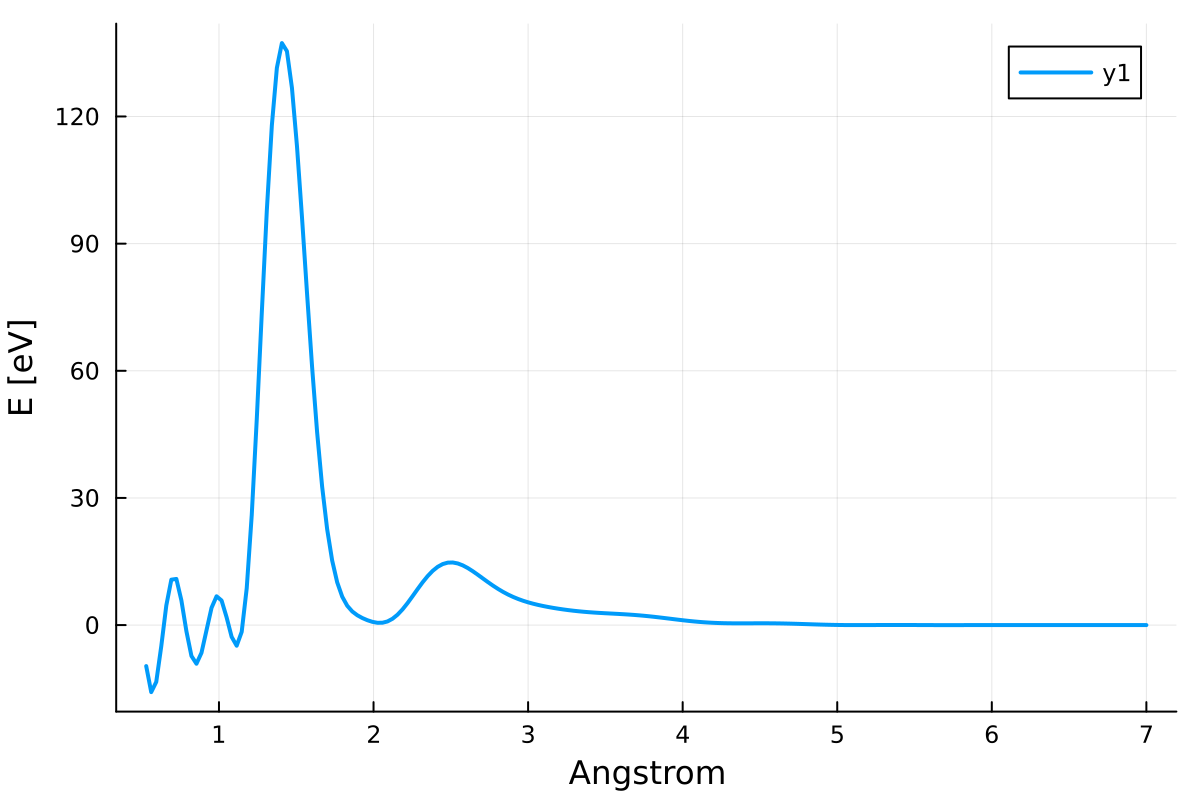

In [17]:
using Plots

plt_dim = plot(
    legend = :topright, 
    xlabel = "Angstrom", ylabel = "E [eV]",
    # xlims = (0, 7), ylims = (-15, 4),
    dpi=200)

plot!(plt_dim, D[(:C,:C)]...,lw=2)
plt_dim